In [257]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import tensorflow as tf

from keras.utils.np_utils import to_categorical


In [258]:
df_train = pd.read_csv('../data/train.csv')
df_train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [259]:
print(type(df_train))
print(df_train.shape)

<class 'pandas.core.frame.DataFrame'>
(42000, 785)


In [260]:
df_test = pd.read_csv('../data/test.csv')
df_test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [261]:
print(type(df_test))
print(df_test.shape)

<class 'pandas.core.frame.DataFrame'>
(28000, 784)


In [262]:
df_train['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [263]:
y_train = df_train.iloc[:,0]

In [264]:
y_train

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [265]:
y_train =to_categorical(y_train, num_classes=10)
y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [266]:
print(type(y_train))
print(y_train.shape)

<class 'numpy.ndarray'>
(42000, 10)


In [267]:
x_train = df_train.iloc[:,1:]

In [268]:
x_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [269]:
print(type(x_train))
print(x_train.shape)

<class 'pandas.core.frame.DataFrame'>
(42000, 784)


In [270]:
x_test = df_test.iloc[:,:]

In [271]:
print(type(x_test))
print(x_test.shape)
x_test

<class 'pandas.core.frame.DataFrame'>
(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [272]:
x_train = x_train.values.reshape(-1,28,28,1)
x_test = x_test.values.reshape(-1,28,28,1)

In [273]:
print(type(x_train))
print(x_train.shape)
print(type(x_test))
print(x_test.shape)

<class 'numpy.ndarray'>
(42000, 28, 28, 1)
<class 'numpy.ndarray'>
(28000, 28, 28, 1)


In [274]:
x_train = tf.keras.utils.normalize(x_train , axis=1)
x_test = tf.keras.utils.normalize(x_test , axis=1)

In [275]:
print(type(x_train))
print(x_train.shape)
print(type(x_test))
print(x_test.shape)

<class 'numpy.ndarray'>
(42000, 28, 28, 1)
<class 'numpy.ndarray'>
(28000, 28, 28, 1)


In [276]:
x_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

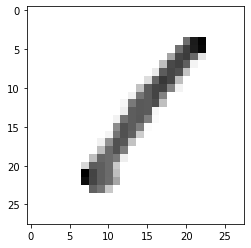

In [277]:
plt.imshow(x_train[0][:,:,0], cmap=plt.cm.binary)

In [278]:
x_train = np.pad(x_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
x_test = np.pad(x_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')

In [279]:
print(type(x_train))
print(x_train.shape)
print(type(x_test))
print(x_test.shape)

<class 'numpy.ndarray'>
(42000, 32, 32, 1)
<class 'numpy.ndarray'>
(28000, 32, 32, 1)


In [280]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D
from keras.optimizers import RMSprop

In [281]:
#Model 

#model = Sequential()

#model.add(Conv2D(filters=6, kernel_size=(5,5), activation='relu' , input_shape=(32,32,1)))
#model.add(MaxPool2D(pool_size=(2,2), ))


In [282]:
model = Sequential()

model.add(Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(32,32,1)))
model.add(MaxPool2D())

model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D())

model.add(Flatten())

model.add(Dense(units=120, activation='relu'))

model.add(Dense(units=84, activation='relu'))

model.add(Dense(units=10, activation = 'softmax'))

In [283]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [284]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [285]:
model.fit(x_train,y_train,epochs=7,batch_size=86)

Epoch 1/7
42000/42000 [==============================] - 6s 134us/step - loss: 0.3769 - accuracy: 0.8864
Epoch 2/7
42000/42000 [==============================] - 6s 139us/step - loss: 0.1157 - accuracy: 0.9643
Epoch 3/7
42000/42000 [==============================] - 6s 131us/step - loss: 0.0771 - accuracy: 0.9766
Epoch 4/7
42000/42000 [==============================] - 6s 131us/step - loss: 0.0598 - accuracy: 0.9807
Epoch 5/7
42000/42000 [==============================] - 6s 135us/step - loss: 0.0478 - accuracy: 0.9846
Epoch 6/7
42000/42000 [==============================] - 5s 131us/step - loss: 0.0377 - accuracy: 0.9876
Epoch 7/7
42000/42000 [==============================] - 6s 132us/step - loss: 0.0321 - accuracy: 0.9902


In [286]:
model.save('v3_lenet.model')

In [287]:
new_model = tf.keras.models.load_model('v3_lenet.model')

In [288]:
predictions = new_model.predict([x_test])

In [289]:
predictions

array([[1.1657844e-09, 7.6712482e-08, 9.9999833e-01, ..., 1.5504213e-07,
        1.1625420e-06, 5.2026068e-09],
       [9.9999130e-01, 9.3104535e-10, 1.8184091e-08, ..., 3.0607356e-07,
        1.7726599e-09, 2.3344585e-06],
       [3.2966328e-11, 4.7351900e-06, 1.6505275e-05, ..., 1.5349896e-06,
        1.8755456e-05, 9.9811327e-01],
       ...,
       [9.6058713e-14, 1.7359859e-08, 1.9207971e-10, ..., 2.7744470e-08,
        3.6161993e-09, 6.5376025e-07],
       [1.2499857e-09, 6.0888334e-09, 1.6821559e-08, ..., 1.6789114e-05,
        1.1884494e-07, 9.9988151e-01],
       [1.9039809e-10, 1.2097934e-07, 9.9999869e-01, ..., 1.7853134e-08,
        9.4517731e-07, 7.4072437e-09]], dtype=float32)

In [290]:
print(np.argmax(predictions[0]))

2


In [291]:
predictions = np.argmax(predictions,axis = 1)

predictions = pd.Series(predictions,name="Label")

In [292]:
predictions

0        2
1        0
2        9
3        9
4        3
        ..
27995    9
27996    7
27997    3
27998    9
27999    2
Name: Label, Length: 28000, dtype: int64

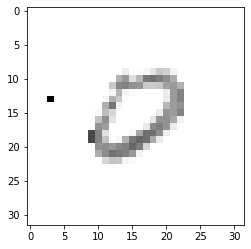

In [293]:
#Wrongly Done by LeNet
plt.imshow(x_test[3][:,:,0], cmap=plt.cm.binary)

In [294]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),predictions],axis = 1)

submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [295]:
#submission.to_csv("v3_cnn_lenet.csv",index=False)